In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [19]:
img= cv2.imread("C:/Users/hp/OneDrive/Desktop/Sportpersonidentifier/model/test_images/sharapova1.jpg")
img.shape

(555, 700, 3)

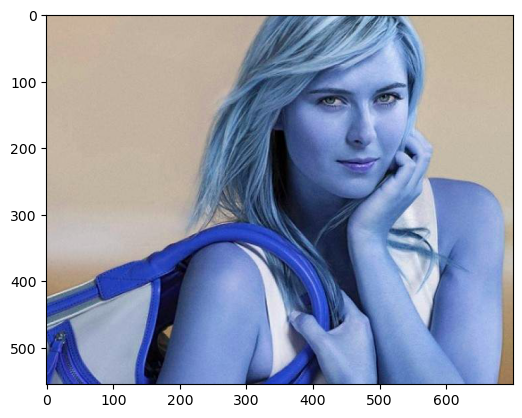

In [13]:
plt.imshow(img)

In [4]:
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

In [5]:
gray

array([[175, 175, 175, ..., 176, 175, 174],
       [175, 175, 175, ..., 177, 175, 174],
       [175, 175, 175, ..., 177, 176, 174],
       ...,
       [ 84,  87,  88, ..., 113, 113, 113],
       [ 88,  89,  90, ..., 113, 113, 113],
       [ 93,  91,  91, ..., 112, 112, 112]], dtype=uint8)

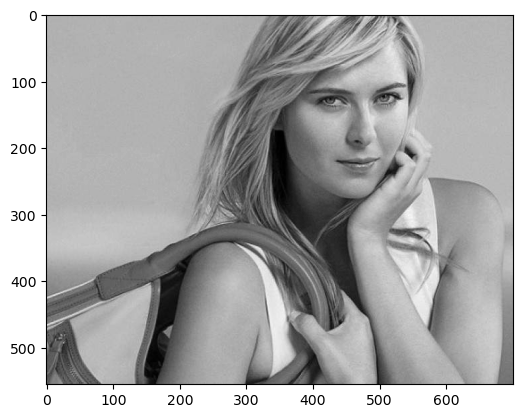

In [6]:
plt.imshow(gray, cmap='gray')

In [8]:
face_cascade = cv2.CascadeClassifier("C:/Users/hp/OneDrive/Desktop/Sportpersonidentifier/server/opencv/data/haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("C:/Users/hp/OneDrive/Desktop/Sportpersonidentifier/server/opencv/data/haarcascades/haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[352,  38, 233, 233]])

In [9]:
(x,y,w,h)=faces[0]
x,y,w,h

(352, 38, 233, 233)

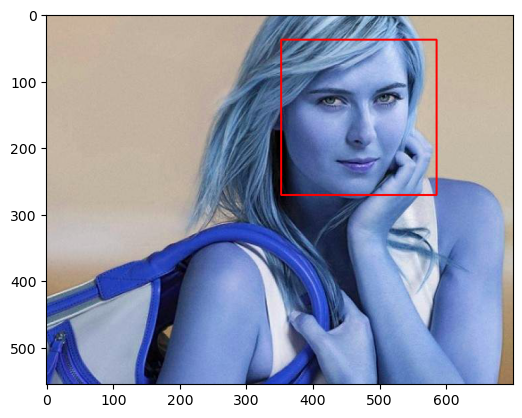

In [10]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

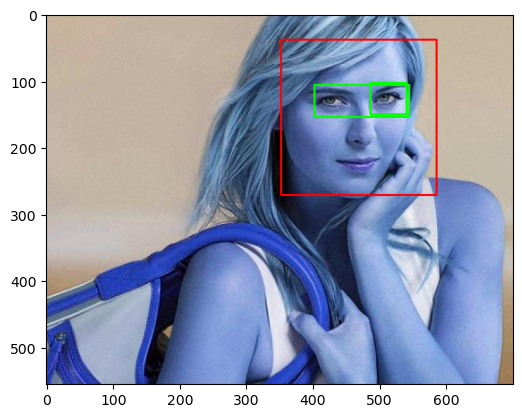

In [20]:
cv2.destroyAllWindows()
for(x,y,w,h) in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=face_img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for(ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ew+ew+ew+ew,ey+eh),(0,255,0),2)
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

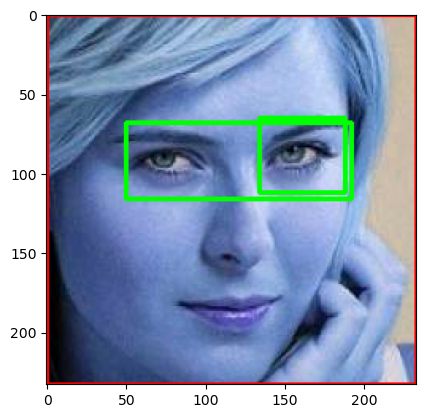

In [21]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [22]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

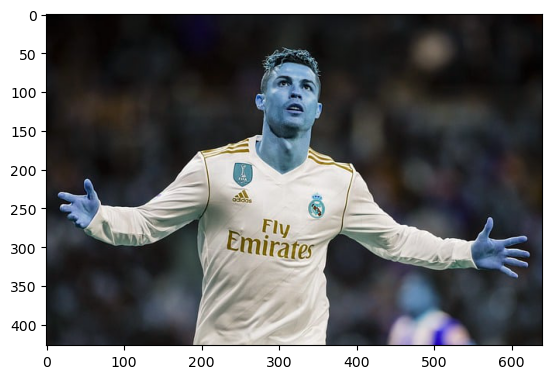

In [23]:
original_img =cv2.imread("C:/Users/hp/OneDrive/Desktop/Sportpersonidentifier/model/test_images/ronaldo.jpg")
plt.imshow(original_img)

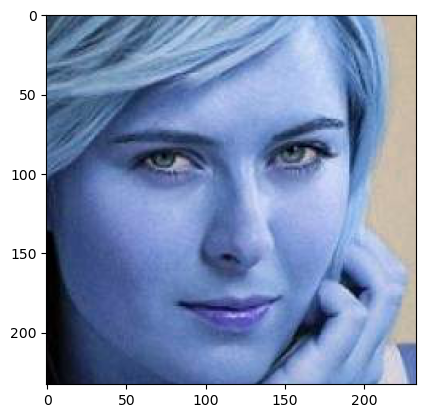

In [24]:
cropped_image = get_cropped_image_if_2_eyes("C:/Users/hp/OneDrive/Desktop/Sportpersonidentifier/model/test_images/sharapova1.jpg")
plt.imshow(cropped_image)

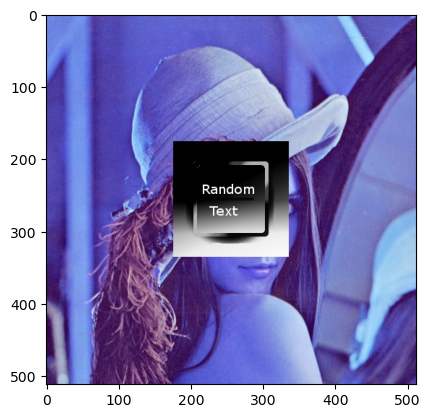

In [25]:
original_img =cv2.imread("C:/Users/hp/OneDrive/Desktop/Sportpersonidentifier/model/test_images/samples/data/lena_tmpl.jpg")
plt.imshow(original_img)

In [26]:
cropped_img = np.array(roi_color)
cropped_img.shape

(233, 233, 3)

In [27]:
cropped_img_no_2_eyes= get_cropped_image_if_2_eyes("C:/Users/hp/OneDrive/Desktop/Sportpersonidentifier/model/test_images/samples/data/lena_tmpl.jpg")
cropped_img_no_2_eyes

In [30]:
path_to_data = "C:/Users/hp/OneDrive/Desktop/Sportpersonidentifier/model/dataset"
path_to_cr_data = "C:/Users/hp/OneDrive/Desktop/Sportpersonidentifier/model/dataset/cropped"

In [32]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['C:/Users/hp/OneDrive/Desktop/Sportpersonidentifier/model/dataset\\cropped',
 'C:/Users/hp/OneDrive/Desktop/Sportpersonidentifier/model/dataset\\lionel_messi',
 'C:/Users/hp/OneDrive/Desktop/Sportpersonidentifier/model/dataset\\maria_sharapova',
 'C:/Users/hp/OneDrive/Desktop/Sportpersonidentifier/model/dataset\\roger_federer',
 'C:/Users/hp/OneDrive/Desktop/Sportpersonidentifier/model/dataset\\serena_williams',
 'C:/Users/hp/OneDrive/Desktop/Sportpersonidentifier/model/dataset\\virat_kohli']

In [33]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [34]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

dataset\cropped
dataset\lionel_messi
Generating cropped images in folder:  C:/Users/hp/OneDrive/Desktop/Sportpersonidentifier/model/dataset/croppeddataset\lionel_messi
dataset\maria_sharapova
Generating cropped images in folder:  C:/Users/hp/OneDrive/Desktop/Sportpersonidentifier/model/dataset/croppeddataset\maria_sharapova
dataset\roger_federer
Generating cropped images in folder:  C:/Users/hp/OneDrive/Desktop/Sportpersonidentifier/model/dataset/croppeddataset\roger_federer
dataset\serena_williams
Generating cropped images in folder:  C:/Users/hp/OneDrive/Desktop/Sportpersonidentifier/model/dataset/croppeddataset\serena_williams
dataset\virat_kohli
Generating cropped images in folder:  C:/Users/hp/OneDrive/Desktop/Sportpersonidentifier/model/dataset/croppeddataset\virat_kohli


In [35]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

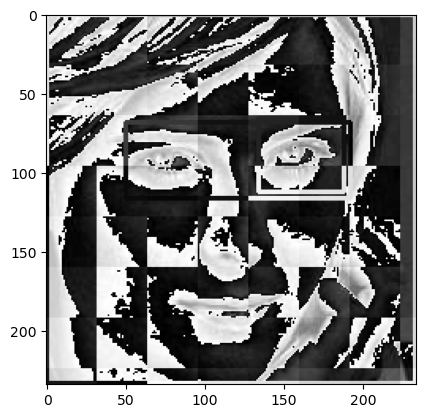

In [36]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [37]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'croppeddataset\\lionel_messi': ['C:/Users/hp/OneDrive/Desktop/Sportpersonidentifier/model/dataset/croppeddataset\\lionel_messi\\lionel_messi1.png',
  'C:/Users/hp/OneDrive/Desktop/Sportpersonidentifier/model/dataset/croppeddataset\\lionel_messi\\lionel_messi10.png',
  'C:/Users/hp/OneDrive/Desktop/Sportpersonidentifier/model/dataset/croppeddataset\\lionel_messi\\lionel_messi11.png',
  'C:/Users/hp/OneDrive/Desktop/Sportpersonidentifier/model/dataset/croppeddataset\\lionel_messi\\lionel_messi13.png',
  'C:/Users/hp/OneDrive/Desktop/Sportpersonidentifier/model/dataset/croppeddataset\\lionel_messi\\lionel_messi14.png',
  'C:/Users/hp/OneDrive/Desktop/Sportpersonidentifier/model/dataset/croppeddataset\\lionel_messi\\lionel_messi15.png',
  'C:/Users/hp/OneDrive/Desktop/Sportpersonidentifier/model/dataset/croppeddataset\\lionel_messi\\lionel_messi16.png',
  'C:/Users/hp/OneDrive/Desktop/Sportpersonidentifier/model/dataset/croppeddataset\\lionel_messi\\lionel_messi17.png',
  'C:/Users/hp/On

In [38]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'croppeddataset\\lionel_messi': 0,
 'croppeddataset\\maria_sharapova': 1,
 'croppeddataset\\roger_federer': 2,
 'croppeddataset\\serena_williams': 3,
 'croppeddataset\\virat_kohli': 4}

In [39]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [40]:
len(X[0])

4096

In [41]:
X[0]

array([[100],
       [129],
       [140],
       ...,
       [237],
       [234],
       [232]], dtype=uint8)

In [42]:
y[0]

0

In [43]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(168, 4096)

In [44]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9047619047619048

In [46]:
len(X_test)

42

In [47]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       1.00      0.90      0.95        10
           2       1.00      0.86      0.92         7
           3       0.88      1.00      0.93         7
           4       0.83      0.91      0.87        11

    accuracy                           0.90        42
   macro avg       0.91      0.90      0.91        42
weighted avg       0.91      0.90      0.91        42



In [48]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [49]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [50]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.832923,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.643077,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.816923,{'logisticregression__C': 1}


In [51]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [53]:
best_estimators['svm'].score(X_test,y_test)

0.9047619047619048

In [54]:
best_estimators['random_forest'].score(X_test,y_test)

0.5238095238095238

In [55]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.9285714285714286

In [56]:
best_clf = best_estimators['svm']

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 7,  0,  0,  0,  0],
       [ 0,  9,  0,  1,  0],
       [ 0,  0,  5,  2,  0],
       [ 0,  1,  0,  6,  0],
       [ 0,  0,  0,  0, 11]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

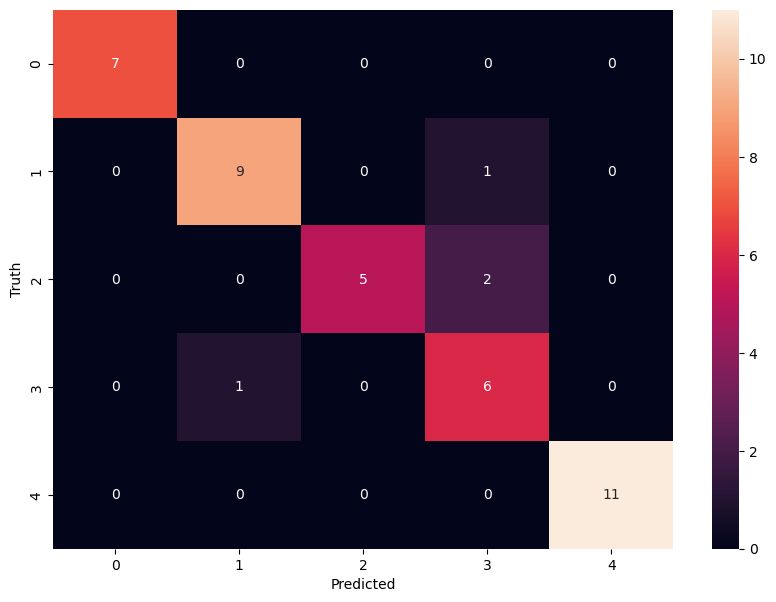

In [58]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [59]:
class_dict

{'croppeddataset\\lionel_messi': 0,
 'croppeddataset\\maria_sharapova': 1,
 'croppeddataset\\roger_federer': 2,
 'croppeddataset\\serena_williams': 3,
 'croppeddataset\\virat_kohli': 4}

In [60]:
#!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [61]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

In [ ]:
########PYCHARM CODE##########


import joblib
import json
import numpy as np
import base64
import cv2
from wavelet import w2d

__class_name_to_number={}
__class_number_to_name={}

__model=None

def classify_image(image_base64_data, file_path=None):
    imgs=get_cropped_image_if_2_eyes(file_path,image_base64_data)

    result=[]

    for img in imgs:
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32 * 32 * 3, 1), scalled_img_har.reshape(32 * 32, 1)))

        len_image_array=32*32*3+32*32
        final= combined_img.reshape(1,len_image_array).astype(float)

        result.append(__model.predict(final)[0])

    return result

def load_saved_artifacts():
    print("loading saved artifacts....strat")
    global __class_name_to_number
    global __class_number_to_name

    with open("C:/Users/hp/OneDrive/Desktop/Sportpersonidentifier/server/artifacts/class_dictionary.json",'r')as f:
        __class_name_to_number=json.load(f)
        __class_number_to_name={v:k for k,v in __class_name_to_number.items()}

    global __model
    if __model is None:
        with open("C:/Users/hp/OneDrive/Desktop/Sportpersonidentifier/server/artifacts/saved_model.pkl",'rb') as f:
            __model=joblib.load(f)
    print("loading saved artifacts.....done")

def class_number_to_name(class_num):
    return __class_number_to_name[class_num]


def get_cv2_image_from_base64_string(b64str):
    '''
    credit:https://stackoverflow.com/questions/33754935/read-a-base-64-encoded-image-from-memory-using-opencv-python-library :param uri:
    :return:
    '''
    encoded_data=b64str.split(',')[1]
    nparr = np.frombuffer(base64.b64decode(encoded_data), np.uint8)
    img=cv2.imdecode(nparr,cv2.IMREAD_COLOR)
    return img


def get_cropped_image_if_2_eyes(image_path, image_base64_data):
    face_cascade = cv2.CascadeClassifier("C:/Users/hp/OneDrive/Desktop/Sportpersonidentifier/server/opencv/data/haarcascades/haarcascade_frontalface_default.xml")
    eye_cascade = cv2.CascadeClassifier("C:/Users/hp/OneDrive/Desktop/Sportpersonidentifier/server/opencv/data/haarcascades/haarcascade_eye.xml")

    if image_path:
        img=cv2.imread(image_path)
    else:
        img=get_cv2_image_from_base64_string(image_base64_data)

    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    cropped_faces=[]
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = img[y:y + h, x:x + w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            cropped_faces.append(roi_color)
    return cropped_faces

def get_b64_test_image_for_virat():
    with open("b64.txt")as f:
        return f.read()

if __name__=="__main__":
    load_saved_artifacts()
    print(class_number_to_name(3))
    #print(classify_image(get_b64_test_image_for_virat(),None))